<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Hepatitis_Spring25_Assigment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [37]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded.

### Define functions

The cell below creates several functions that are needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [53]:
# Create functions for this lesson
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Convert floats to integers
def force_to_binary(floats, threshold=0.5):
    """
    Convert floats ranging from 0.0 to 1.0 to binary values (0 or 1) based on a threshold.

    Parameters:
    floats (list or array): List or array of float values.
    threshold (float): Threshold value to determine conversion. Default is 0.5.

    Returns:
    list: List of binary values (0 or 1).
    """
    return [1 if x >= threshold else 0 for x in floats]

def list_float_columns(dataframe):
    """
    Create a list of all columns in a DataFrame that contain float values.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check.

    Returns:
    list: A list of column names that contain float values.
    """
    float_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'float64']
    return float_columns

# **Assigment 1: Keras Neural Networks**

**Assignment_01** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can perform either classification or regression on tabular data.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment.


# **Your Dataset for Assignmment_01**

The last digit in your myUTSA ID (e.g. 'abc123`) will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED**.

If you are uncertain which dataset you should be working on, contact your Instructor for help.

Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| Last Digit myUTSA ID     | Dataset to Analyze       | Neural Network Type
---------------------------|--------------------------|-----------------
0                          | Parkinson’s Disease      | Classification
1                          | Thyroid Disease          | Classification
2                          | Stroke Prediction        | Classification
3                          | Hepatitis                | Classification
4                          | Breast Cancer Coimbra    | Classification
5                          | Parkinson's Telemonitor. | Regression
6                          | Bone Marrow Transplant   | Regression
7                          | Bioavailability          | Regression
8                          | METABRIC Breast Cancer   | Regression
9                          | Diabetes Progression     | Regression



## **Dataset Description**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset.

1.  **Parkinson’s Disease Classification**
* **Description:** The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.
* **Target Variable:** Binary classification (Parkinson’s or not).
* **Features:** Various voice-related metrics such as jitter, shimmer, pitch, etc.
Source : UCI Machine Learning Repository.
Use Case : Parkinson's disease prediction.

### **Step - 1: Download and Extract Data**

**REF: Class_01_6**

In the cell below, write the code to download your datafile from the course server and create a Pandas DataFrame to store your data. Use the function `display()` to show the data in six columns and six rows.


In [45]:
# Step 1: Download and Extract Data

import numpy as np
import pandas as pd

# Read file and create DataFrame
hepDF = pd.read_csv(
    "https://biologicslab.co/BIO1173/data/hepatitis.csv",
#    index_col=0,
    na_values=['NA','?'])

# Set display options
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Display DataFrame
display(hepDF)

,class,AGE,SEX,STEROID,...,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,1,30,2,1,...,18,4.0,62,1
1,1,50,1,1,...,42,3.5,62,1
2,1,78,1,2,...,32,4.0,62,1
3,1,31,1,2,...,52,4.0,80,1
...,...,...,...,...,...,...,...,...,...
151,1,44,1,2,...,142,4.3,62,2
152,1,61,1,1,...,20,4.1,62,2
153,1,53,2,1,...,19,4.1,48,2
154,0,43,1,2,...,19,3.1,42,2


## **Step 2: Describe DataFrame**

**REF: Class_06_1**



In [46]:
# Step 2: Describe DataFrame

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Describe() method with df1
hepDF.describe()

,class,AGE,SEX,STEROID,...,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000
mean,0.793548,41.200000,1.103226,1.509677,...,85.896774,3.815484,61.916129,1.451613
std,0.406070,12.565878,0.305240,0.501527,...,88.478934,0.616772,17.193685,0.499266
min,0.000000,7.000000,1.000000,1.000000,...,14.000000,2.100000,0.000000,1.000000
25%,1.000000,32.000000,1.000000,1.000000,...,32.500000,3.500000,57.000000,1.000000
50%,1.000000,39.000000,1.000000,2.000000,...,59.000000,3.900000,62.000000,1.000000
75%,1.000000,50.000000,1.000000,2.000000,...,99.000000,4.200000,65.000000,2.000000
max,1.000000,78.000000,2.000000,2.000000,...,648.000000,6.400000,100.000000,2.000000


## **Step - 3: Display Data Types**

In the cell below, write the code to print out the different data types in your DataFrame   

In [47]:
# Step - 2: Display data types

import pandas as pd

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(pdDF.columns))

# Print data types
hepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          155 non-null    int64  
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    int64  
 6   MALAISE          155 non-null    int64  
 7   ANOREXIA         155 non-null    int64  
 8   LIVER_BIG        155 non-null    int64  
 9   LIVER_FIRM       155 non-null    int64  
 10  SPLEEN_PALPABLE  155 non-null    int64  
 11  SPIDERS          155 non-null    int64  
 12  ASCITES          155 non-null    int64  
 13  VARICES          155 non-null    int64  
 14  BILIRUBIN        155 non-null    float64
 15  ALK_PHOSHATE     150 non-null    float64
 16  SGOT             155 non-null    int64  
 17  ALBUMIN         

Take a good look at your output. Make a note of the `shape` value for the array called `train_X`.

The `shape` should have 4 numbers. The first number is the number of images in your particular dataset. The next 2 numbers are the dimensions (in pixels) of the image and the last number specifies the number of color channels. For example, the number `3` means a color image (RGB).

**You will need to know these 4 numbers later in your analysis.** Please note that these values vary significantly between the different datasets.

## **Step 4: Describe the DataFrame**

**REF: Class_01_6**

In the cell below, write the code to print out the different data types in your DataFrame   

In [41]:
# Step 4: Describe the dataframe

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_rows', len(pdDF.columns))
pd.set_option('display.max_columns', 28)

# Print data types
hepDF.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIQUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,150.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.600000,1.787097,1.819355,1.574194,1.800000,1.658065,1.870968,1.877419,1.422581,105.273333,85.896774,3.815484,61.916129,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.491486,0.410687,0.385971,0.496067,0.401297,0.475896,0.336322,0.329018,1.189377,47.177929,88.478934,0.616772,17.193685,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,59.000000,3.900000,62.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,120.000000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


## **Step 5: Find Missing Values**

**REF: Class_06_1**

In the cell below, write the code to print out the different data types in your DataFrame   

In [48]:
# Step 5: Find Missing Values

import pandas as pd

# Find the locations of missing data
missing_locations = hepDF.isnull().any()

# Set max rows to the number of columns
pd.set_option('display.max_rows', len(pdDF.columns))

# Display the locations of missing data
print(missing_locations)

class              False
AGE                False
SEX                False
STEROID            False
ANTIVIRALS         False
FATIGUE            False
MALAISE            False
ANOREXIA           False
LIVER_BIG          False
LIVER_FIRM         False
SPLEEN_PALPABLE    False
SPIDERS            False
ASCITES            False
VARICES            False
BILIRUBIN          False
ALK_PHOSHATE        True
SGOT               False
ALBUMIN            False
PROTIME            False
HISTOLOGY          False
dtype: bool


## **STEP 5: Replace Missing Values**

**REF: Class_01_6**


In [51]:
# Step 5: Replace Missing Values

import pandas as pd

# Find the median of the column petal_w
ALK_PHOSHATE_med = hepDF['ALK_PHOSHATE'].median()

# Print out the median value
print(f"The median value = {ALK_PHOSHATE_med} for ALK_PHOSHATE.")
print(f"Replacing missing values with {ALK_PHOSHATE_med}.")

# Use fillna method
hepDF['ALK_PHOSHATE'] = hepDF['ALK_PHOSHATE'].fillna(ALK_PHOSHATE_med)

# Find the locations of missing data
print("\nLooking for missing values...")  # The \n means print a newline
missing_locations = hepDF.isnull().any()

# Display the locations of missing data
print(missing_locations)

The median value = 100.0 for ALK_PHOSHATE.
Replacing missing values with 100.0.

Looking for missing values...
class              False
AGE                False
SEX                False
STEROID            False
ANTIVIRALS         False
FATIGUE            False
MALAISE            False
ANOREXIA           False
LIVER_BIG          False
LIVER_FIRM         False
SPLEEN_PALPABLE    False
SPIDERS            False
ASCITES            False
VARICES            False
BILIRUBIN          False
ALK_PHOSHATE       False
SGOT               False
ALBUMIN            False
PROTIME            False
HISTOLOGY          False
dtype: bool


## **Step 6: Shuffle and Reindex your DataFrame**

**REF: Class_02.3**

In the cell below, shuffle and reindex your DataFrame.

In [52]:
# Step 6: Shuffle and Reindex your DataFrame

import pandas as pd
import numpy as np

# Set the random seed to 42
np.random.seed(42)

# Use random.permutation function for shuffling & reindexing
hepDF = hepDF.reindex(np.random.permutation(hepDF.index))

# Set the max rows and max columns
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 8)

# Display the shuffled & reindexed DataFrame
display(hepDF)

,class,AGE,SEX,STEROID,...,SGOT,ALBUMIN,PROTIME,HISTOLOGY
81,1,36,1,2,...,224,4.2,100,1
142,1,51,1,2,...,20,3.0,63,2
31,0,62,1,1,...,60,3.8,62,1
29,1,51,1,1,...,58,4.6,52,1
...,...,...,...,...,...,...,...,...,...
106,0,35,1,1,...,58,2.6,62,2
14,1,47,1,1,...,60,3.8,62,1
92,1,33,1,2,...,60,4.0,62,2
102,1,27,1,1,...,227,3.0,66,2


## **Step 7: Normalize Data**

**REF: Class_02_2**



In [64]:
# Step 7: Normalize data

import pandas as pd
from scipy.stats import zscore

float_columns = list_float_columns(hepDF)
print(f"Columns with float values: {float_columns}")

for col in float_columns:
    hepDF[col] = zscore(hepDF[col])

# Print the first 5 values of each float column
for col in float_columns:
    print(f"First 5 values in column '{col}': {hepDF[col].head().tolist()}")

Columns with float values: ['BILIRUBIN', 'ALK_PHOSHATE', 'ALBUMIN']
First 5 values in column 'BILIRUBIN': [-0.6094981992346672, -0.35644760758813127, -0.35644760758813127, -0.35644760758813127, -0.019046818726083322]
First 5 values in column 'ALK_PHOSHATE': [-0.9316558798843141, -0.002231177080998231, -0.11030381694184892, -0.5858234323295919, -0.002231177080998231]
First 5 values in column 'ALBUMIN': [0.625453755512405, -1.3264656828316768, -0.025186057268956175, 1.2760935682937646, -0.025186057268956175]


## **Step 6 - Preprocess Data for Neural Network Training**


In [16]:
# Step 6 - Preprocess Data for Neural Network Training**

import pandas as pd
from scipy.stats import zscore

# Generate column list for preprocessing
hepX_columns = hepDF.columns.drop('Class')

# Replace values with their Z-scores
for col in hepX_columns:
    hepDF[col] = zscore(hepDF[col])

# Generate X feature vector
hepX = hepDF[hepX_columns].values
hepX = np.asarray(hepX).astype(np.float32)

# Generate Y as Numpy array
hepY = hepDF['Class']
hepY = np.asarray(hepY).astype(np.float32)

# Print out X and Y
np.set_printoptions(suppress=True,precision=4)
print("The first 4 X-values are:")
print(hepX[0:4])
print("\nTheir corresponding Y-values are:")
print(hepY[0:4])

The first 4 X-values are:
[[-0.4152 -0.3393  0.9808  0.428   1.3676  0.8165  0.5201  0.4695  0.8611
   0.5     0.7208  0.3849  0.3738 -0.6095 -0.9353  1.5659  0.6255  2.2222
  -0.9075]
 [ 0.7824 -0.3393  0.9808  0.428  -0.7312  0.8165  0.5201  0.4695 -1.1612
  -2.     -1.3873  0.3849 -2.6754 -0.3564 -0.0057 -0.7472 -1.3265  0.0632
   1.1019]
 [ 1.6606 -0.3393 -1.0195  0.428  -0.7312 -1.2247  0.5201  0.4695 -1.1612
   0.5     0.7208  0.3849  0.3738 -0.3564 -0.0057 -0.2936 -0.0252  0.0049
  -0.9075]
 [ 0.7824 -0.3393 -1.0195 -2.3363 -0.7312 -1.2247  0.5201  0.4695  0.8611
   0.5     0.7208  0.3849  0.3738 -0.3564 -0.5894 -0.3163  1.2761 -0.5786
  -0.9075]]

Their corresponding Y-values are:
[2. 2. 1. 2.]


## **Step 7:  Construct and Compile Neural Network**

In [18]:
# Step 7: Construct and Compile Neural Network

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.metrics import Precision, Recall

import numpy as np
from sklearn.model_selection import train_test_split

# Split into train/test---------------------------------------------------------
hepX_train, hepX_test, hepY_train, hepY_test = train_test_split(
    hepX, hepY, test_size=0.25, random_state=42)

# Construct model---------------------------------------------------------------
hepModel = Sequential()
hepModel.add(Input(shape=(hepX.shape[1],)))
hepModel.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
hepModel.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
hepModel.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
hepModel.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

# Compile model------------------------------------------------------------------
hepModel.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # SpecirisY learning rate
    metrics=['accuracy', Precision(), Recall()]  # Add additional metrics
)



## **Step 8: Print Summary of Your Model**

In [19]:
# Step 8: Print Summary of Your Model

hepModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,351 (32.62 KB)

 Trainable params: 8,351 (32.62 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 9: Create Early Stopping Monitor**

In [20]:
# Step 9: Create early stopping monitor

hepMonitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

## **Step 9: Train Model**

In [22]:
# Step 9: Train Model

# Set variables
EPOCHS=100
VERBOSE=2

# Train model
hepModel.fit(hepX_train,hepY_train,validation_data=(hepX_test,hepY_test),
          callbacks=[hepMonitor],verbose=VERBOSE,epochs=EPOCHS)



Epoch 1/100
4/4 - 0s - 45ms/step - accuracy: 0.2328 - loss: -6.3777e+06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1282 - val_loss: -3.7675e+06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/100
4/4 - 0s - 34ms/step - accuracy: 0.2328 - loss: -6.4697e+06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1282 - val_loss: -3.8263e+06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/100
4/4 - 0s - 35ms/step - accuracy: 0.2328 - loss: -6.5741e+06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1282 - val_loss: -3.8840e+06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/100
4/4 - 0s - 85ms/step - accuracy: 0.2328 - loss: -6.6757e+06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1282 - val_loss: -3.9423e+06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/100
4/4 - 0s - 64ms/step - accuracy: 0.2328 - loss: -6.7750e+06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.1282 - val_loss: -4.0023e+06 - val_precision: 1.0000 - val_recall: 1.

## **Step 10: Compute Accuracy Score**

In [25]:
# Step 10: Compute Accuracy Score

from sklearn.metrics import accuracy_score

predictions=force_to_binary(hepModel.predict(hepX_test))
true_labels = hepY_test

accuracy = accuracy_score(predictions, true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Accuracy: 12.82%


## **Step 11: Plot ROC Curve**



In [33]:
#print(hepY_test-1)
print(len(hepY_test))

39


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


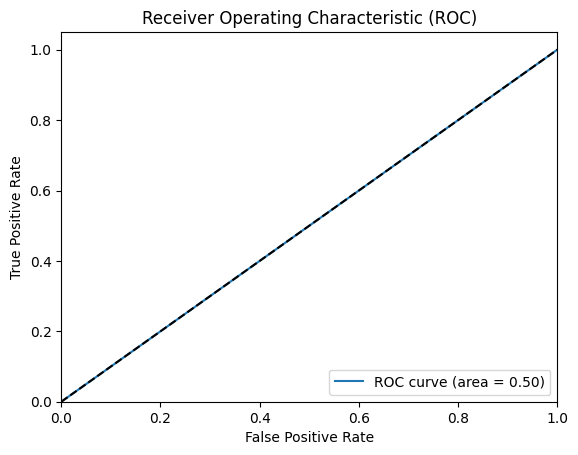

In [30]:
# Step 11: Plot ROC Curve

# Use model to generate predictions
hepPred = hepModel.predict(hepX_test)

# Plot model predictions against actual values
plot_roc(hepPred,hepY_test-1)

## **Step 12: Calculate Log Loss**

In [36]:
# Step 12: Calculate Log Loss

from IPython.display import display
import numpy as np
from sklearn import metrics

# Generate predictions
hepProb = hepModel.predict(hepX_test)

# Ensure the predicted probabilities sum to one for each sample
print("Sum of probabilities for the first prediction:", np.sum(hepProb[0]))

# Print prediction probabilities (first 6 samples)
print("Numpy array of predictions")
display(hepProb[0:5])

# As percent probability
print("As percent probability")
print(hepProb[0] * 100)

# Calculate log loss score
score = metrics.log_loss(hepY_test, hepProb)
print("Log loss score: {}".format(score))

# Convert raw probabilities to chosen class (highest probability)
hepPred = np.argmax(hepProb, axis=1)

# Print out prediction values (first 6 samples)
print(hepPred[0:6])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sum of probabilities for the first prediction: 1.0
Numpy array of predictions


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

As percent probability
[100.]
Log loss score: 2.0438956363464063
[0 0 0 0 0 0]


## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Poly-A Tail**

## **DeepSeek**

